In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [61]:
# df=pd.read_csv('dataset.csv')
df=pd.read_csv('ratio_dataset.csv')
df = df.drop(columns=['step','nameOrig', 'nameDest','isFlaggedFraud'])
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [62]:
df.shape

(3867, 7)

In [63]:
df['isFraud'].value_counts()

isFraud
0    3843
1      24
Name: count, dtype: int64

In [64]:
# df['isFraud']=df['isFraud'].map({0:'No Fraud',1:'Fraud'})
# df['isFraud']=df['isFraud'].map({'No Fraud':0,'Fraud':1})

In [65]:
df['type']=df['type'].map({'PAYMENT':2, 'TRANSFER':4, 'CASH_OUT':1, 'DEBIT':5, 'CASH_IN':3})

In [66]:
x=df[['type','amount','oldbalanceOrg','newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]
y=df.iloc[:,-1]

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [68]:
from sklearn.ensemble import RandomForestClassifier
modelRFC = RandomForestClassifier()
modelRFC.fit(x_train, y_train)

# x_test_selected = selector.transform(x_test)
y_pred = modelRFC.predict(x_test)
# print(y_pred)

In [69]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy*100)

99.6124031007752


In [70]:
# [[0:'type',1:'amount',2:'oldbalanceOrg',3:'newbalanceOrig', 4:'oldbalanceDest', 5:'newbalanceDest']]

# resultRFC = modelRFC.predict([[4,181,181,0,0,0]])
resultRFC = modelRFC.predict(x_test)

# print(resultRFC)

In [71]:
print(confusion_matrix(y_test, resultRFC))

[[768   0]
 [  3   3]]


In [72]:
resultRFC.shape

(774,)

In [73]:
classification_report_RFC = classification_report(y_test, resultRFC)
print(classification_report_RFC)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       768
           1       1.00      0.50      0.67         6

    accuracy                           1.00       774
   macro avg       1.00      0.75      0.83       774
weighted avg       1.00      1.00      1.00       774



In [74]:
import pickle

with open('RFC_model.pkl', 'wb') as model_file:
    pickle.dump(modelRFC, model_file, protocol=2)

Text(0.5, 1.0, 'Accuracy Score: 99.6124031007752')

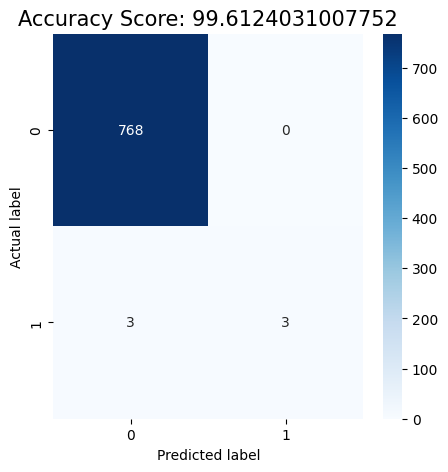

In [75]:
plt.figure(figsize=(5,5))
sns.heatmap(data=confusion_matrix(y_test, y_pred),fmt='.0f',annot= True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(modelRFC.score(x_test, y_test)*100)
plt.title(all_sample_title, size = 15)

In [76]:
import pickle

with open('pkl_models/RFC_model.pkl', 'wb') as model_file:
    pickle.dump(modelRFC, model_file, protocol=2)